In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [16]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
df = pd.read_csv('./data/data_set/조건에 맞는 맛집 추출.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수
0,도이칠란드 박,4.6,성북구,서울특별시 성북구 솔샘로6길 30-15 1F,다국적음식,만원-2만원,2022-07-04,맛있다,21,19.0,0.0,2.0
1,공푸,4.5,성북구,서울특별시 성북구 삼선교로24길 29,중식,만원 미만,2022-07-07,별로,91,76.0,11.0,4.0
2,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41,35.0,6.0,0.0
3,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31,28.0,3.0,0.0
4,모짜,4.4,성북구,서울특별시 성북구 성북로 102,양식,만원-2만원,2022-01-31,괜찮다,49,39.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,헤비로테이트,4.0,마포구,서울특별시 마포구 새창로2길 17,카페/디저트,만원 미만,2022-06-28,맛있다,26,22.0,2.0,2.0
1093,카멜 커피,4.0,마포구,서울특별시 마포구 양화로23길 22-7,카페/디저트,만원 미만,2022-08-03,괜찮다,36,23.0,12.0,1.0
1094,포프트커피,4.0,마포구,서울특별시 마포구 숭문길 24,카페/디저트,만원 미만,2022-07-24,맛있다,22,16.0,5.0,1.0
1095,영원식당,4.0,마포구,서울특별시 마포구 양화로7길 6-5 와와빌딩 2동 2F,한식,만원 미만,2022-07-10,맛있다,33,24.0,4.0,5.0


In [39]:
df.value_counts('구')

구   
마포구     341
동대문구    296
성북구     245
서대문구    134
중랑구      81
dtype: int64

In [8]:
df1 = pd.DataFrame(df.음식종류.value_counts())

In [11]:
df1.rename(columns = {'음식종류':'맛집 수'}, inplace = True)

In [12]:
df1

,맛집 수
한식,278
양식,207
카페/디저트,179
일식,160
중식,97
다국적음식,78
주점,64
기타,21
다국적아시아음식,8
뷔페,5


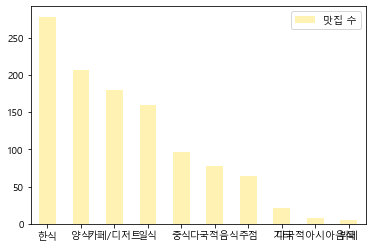

In [23]:
df1.plot.bar(rot=0, width=0.5, color = ['gold', 'b', '#FF0000', 'green','#FF0010','#FF0020','#FF0030',\
                                 '#FF0040','#FF0050','#FF0060','#FF0070','#FF0080','#FF0090',\
                                 '#600000','#700000','#800000','#900000','#500000','#400000','#300000'], alpha = 0.3)
#print(axis)
plt.show()

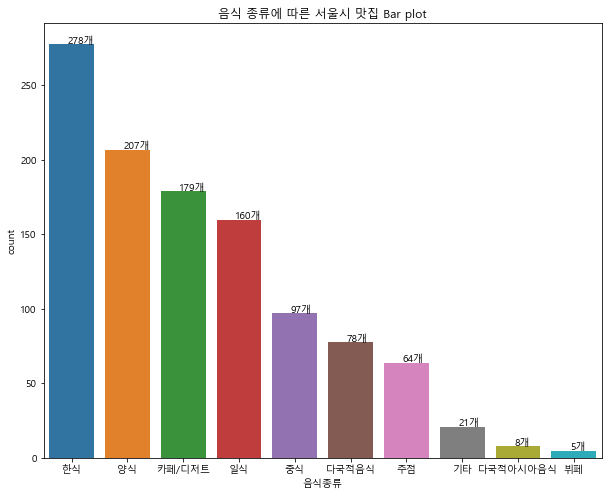

In [40]:
ordered_index = df.value_counts('음식종류').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='음식종류', data=df, order=ordered_index)

plt.title('음식 종류에 따른 서울시 맛집 Bar plot')
plt.xlabel('음식종류')

    
for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))